In [1]:
from src import MACGenerator, UDP_TX, SlidingBook
import src.TX as TX

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import socket
import struct
import time
import json
import cv2

import sys

sys.path.append('..')
import utils.utils as utils








def tx_param(IP, PORT, param:dict):
# send the parameters to the receiver and the time.time() to synchronize the sender and the receiver
    with socket.socket(socket.AF_INET, socket.SOCK_STREAM) as s:
        s.connect((IP, PORT))
        data = json.dumps(param).encode()

        for i in range(len(data)//1000):
            s.send(data[i*1000:(i+1)*1000])
            time.sleep(.01)
        s.send(data[(i+1)*1000:])
        time.sleep(.1)
        s.send(b'END')
        time.sleep(.1)
        data = time.time()
        data = struct.pack('d', data)
        s.send(data)
        s.close()



def run_experiment(IP, PORT, param:dict):
    # Capture video from the default camera
    cap = cv2.VideoCapture(0) 
    # Define the compression parameters for Progressive JPEG
    compression_params = [cv2.IMWRITE_JPEG_PROGRESSIVE, 1, cv2.IMWRITE_JPEG_QUALITY, param['QUALITY']]
    ## counting the number of frames per second

    start_time = time.time()
    runTime_cnt = time.time()
    frame_counter = 0
    average_tx_size = 0
    while True:
        ret, frame = cap.read()
        # Encode the image to JPEG format in memory
        success, encoded_frame = cv2.imencode('.jpg', frame, compression_params)
        data = encoded_frame.tobytes()
        average_tx_size+=len(data)//1000

        #############################  TX  ########################################
        buffer = SlidingBook(num_pages=40, page_size=len(param['X']))
        page_processor = MACGenerator(X = param['X'], Y = param['Y'], secret_key=param['KEY'].encode(), digestmod=param['DIGESTMOD'])
        udp_tx = UDP_TX(IP= IP, PORT= PORT, buffer=buffer, page_processor= page_processor, Payload_Size_Byte = param['PAYLOAD_SIZE_BYTE'])
        pages = udp_tx.segment_to_pages(data)
        udp_tx.transmit(pages, param['ATTACK_PROBABILITY'])
        ###########################################################################

        cv2.imshow('Webcam', frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):  # Press 'q' to quit
            break

        # print the frame rate
        frame_counter += 1
        if time.time() - start_time >= 1:
            print("frame per second: ", frame_counter, "fps ,data rate: ", average_tx_size, "KB/s")
            frame_counter = 0
            start_time = time.time()
            average_tx_size = 0
        if time.time() - runTime_cnt >= param['DURATION']:
            break
    cv2.destroyAllWindows()
    cap.release()
    time.sleep(1)



#### test the function
###### IP, PORRT ######
IP = "10.42.0.15"
PORT = 23422
#######################

#### parameters that needs to be exhanged between the sender and the receiver #####
param ={}

#traditional MAC
X = np.eye(10)
Y = np.eye(10)

param['X'] = X.tolist()
param['Y'] = Y.tolist()
param['KEY'] = "key"
param['DIGESTMOD'] = 'sha384'
param['PAYLOAD_SIZE_BYTE']= 1024
param['QUALITY'] = 70   # param['QUALITY'] of the JPEG compression
param['ATTACK_PROBABILITY'] = 0.00  # probability of the attack
param['DURATION'] = 10  # running time of the sender in seconds
####################################################################################
tx_param(IP, PORT, param)
run_experiment(IP, PORT, param)

[ WARN:0@0.627] global ./modules/videoio/src/cap_gstreamer.cpp (1405) open OpenCV | GStreamer warning: Cannot query video position: status=0, value=-1, duration=-1


frame per second:  28 fps ,data rate:  1317 KB/s
frame per second:  30 fps ,data rate:  1410 KB/s
frame per second:  31 fps ,data rate:  1457 KB/s
frame per second:  31 fps ,data rate:  1457 KB/s
frame per second:  30 fps ,data rate:  1346 KB/s
frame per second:  30 fps ,data rate:  1350 KB/s
frame per second:  30 fps ,data rate:  1325 KB/s
frame per second:  31 fps ,data rate:  1264 KB/s
frame per second:  31 fps ,data rate:  1295 KB/s


Total runtime for experiments:  2.6666666666666665 minutes


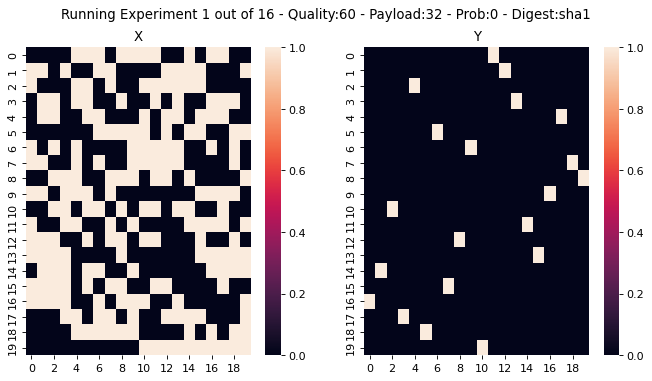

[ WARN:0@12.604] global ./modules/videoio/src/cap_gstreamer.cpp (1405) open OpenCV | GStreamer warning: Cannot query video position: status=0, value=-1, duration=-1


frame per second:  23 fps ,data rate:  897 KB/s
frame per second:  25 fps ,data rate:  975 KB/s
frame per second:  24 fps ,data rate:  848 KB/s
frame per second:  25 fps ,data rate:  901 KB/s
frame per second:  26 fps ,data rate:  1005 KB/s
frame per second:  25 fps ,data rate:  944 KB/s
frame per second:  25 fps ,data rate:  975 KB/s
frame per second:  25 fps ,data rate:  973 KB/s
frame per second:  24 fps ,data rate:  933 KB/s


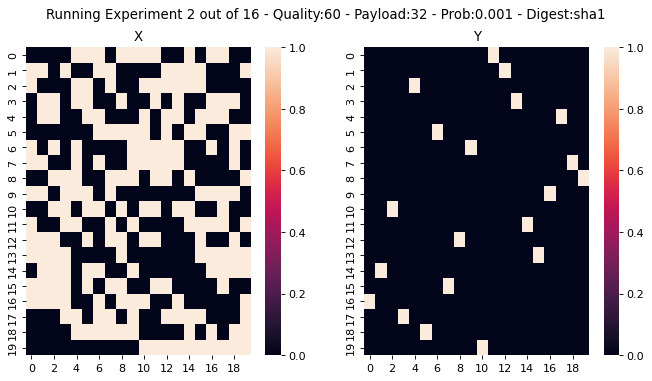

[ WARN:0@24.479] global ./modules/videoio/src/cap_gstreamer.cpp (1405) open OpenCV | GStreamer warning: Cannot query video position: status=0, value=-1, duration=-1


frame per second:  23 fps ,data rate:  905 KB/s
frame per second:  23 fps ,data rate:  899 KB/s
frame per second:  25 fps ,data rate:  986 KB/s
frame per second:  26 fps ,data rate:  1021 KB/s
frame per second:  25 fps ,data rate:  1000 KB/s
frame per second:  25 fps ,data rate:  1000 KB/s
frame per second:  25 fps ,data rate:  984 KB/s
frame per second:  26 fps ,data rate:  1027 KB/s
frame per second:  23 fps ,data rate:  935 KB/s


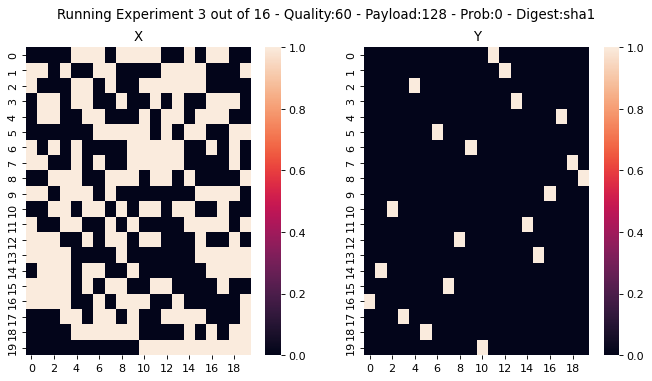

[ WARN:0@36.436] global ./modules/videoio/src/cap_gstreamer.cpp (1405) open OpenCV | GStreamer warning: Cannot query video position: status=0, value=-1, duration=-1


frame per second:  30 fps ,data rate:  1187 KB/s
frame per second:  30 fps ,data rate:  1199 KB/s
frame per second:  31 fps ,data rate:  1197 KB/s
frame per second:  31 fps ,data rate:  1188 KB/s
frame per second:  31 fps ,data rate:  1191 KB/s
frame per second:  31 fps ,data rate:  1259 KB/s
frame per second:  31 fps ,data rate:  1246 KB/s
frame per second:  30 fps ,data rate:  1195 KB/s
frame per second:  31 fps ,data rate:  1234 KB/s


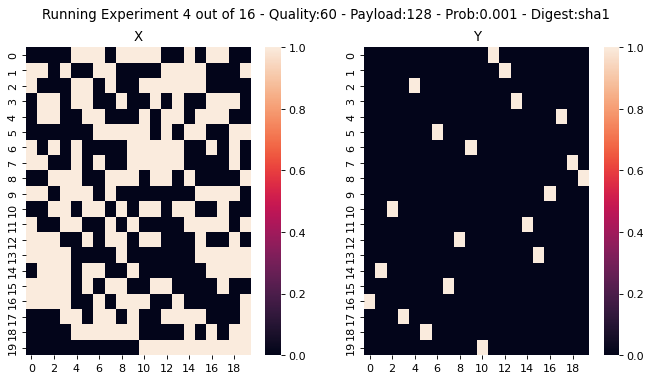

[ WARN:0@48.415] global ./modules/videoio/src/cap_gstreamer.cpp (1405) open OpenCV | GStreamer warning: Cannot query video position: status=0, value=-1, duration=-1


frame per second:  30 fps ,data rate:  1170 KB/s
frame per second:  30 fps ,data rate:  1119 KB/s
frame per second:  31 fps ,data rate:  1165 KB/s
frame per second:  31 fps ,data rate:  1183 KB/s
frame per second:  31 fps ,data rate:  1218 KB/s
frame per second:  31 fps ,data rate:  1217 KB/s
frame per second:  30 fps ,data rate:  1186 KB/s
frame per second:  31 fps ,data rate:  1222 KB/s
frame per second:  30 fps ,data rate:  1186 KB/s


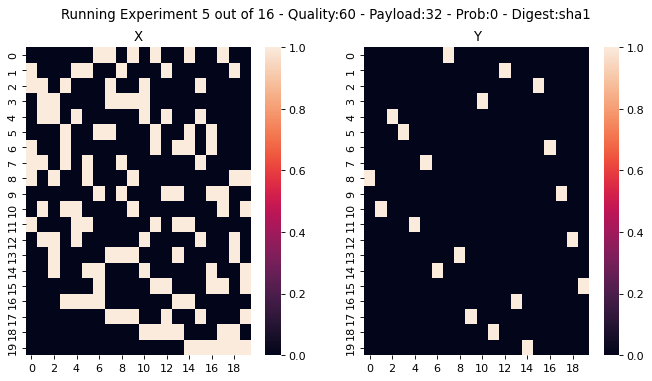

[ WARN:0@60.408] global ./modules/videoio/src/cap_gstreamer.cpp (1405) open OpenCV | GStreamer warning: Cannot query video position: status=0, value=-1, duration=-1


frame per second:  22 fps ,data rate:  865 KB/s
frame per second:  24 fps ,data rate:  951 KB/s
frame per second:  26 fps ,data rate:  1040 KB/s
frame per second:  26 fps ,data rate:  967 KB/s
frame per second:  23 fps ,data rate:  925 KB/s
frame per second:  22 fps ,data rate:  901 KB/s
frame per second:  22 fps ,data rate:  902 KB/s
frame per second:  23 fps ,data rate:  945 KB/s
frame per second:  23 fps ,data rate:  959 KB/s


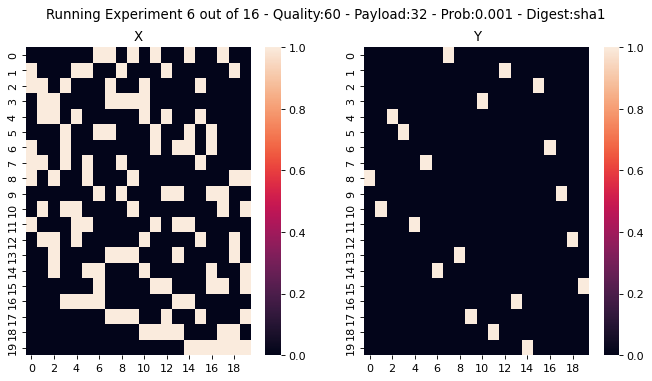

[ WARN:0@72.383] global ./modules/videoio/src/cap_gstreamer.cpp (1405) open OpenCV | GStreamer warning: Cannot query video position: status=0, value=-1, duration=-1


frame per second:  25 fps ,data rate:  903 KB/s
frame per second:  28 fps ,data rate:  1000 KB/s
frame per second:  27 fps ,data rate:  972 KB/s
frame per second:  28 fps ,data rate:  972 KB/s
frame per second:  29 fps ,data rate:  1002 KB/s
frame per second:  29 fps ,data rate:  1042 KB/s
frame per second:  25 fps ,data rate:  925 KB/s
frame per second:  25 fps ,data rate:  923 KB/s
frame per second:  26 fps ,data rate:  949 KB/s


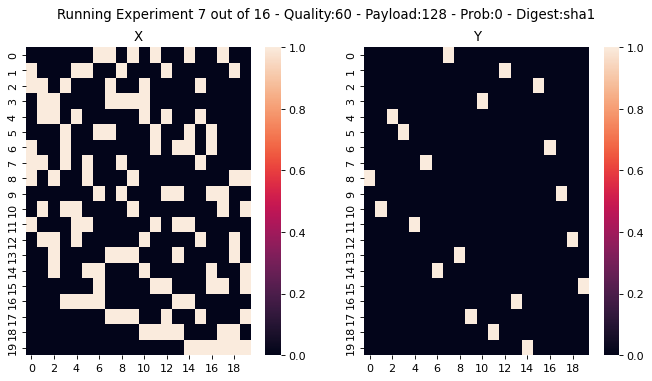

[ WARN:0@84.245] global ./modules/videoio/src/cap_gstreamer.cpp (1405) open OpenCV | GStreamer warning: Cannot query video position: status=0, value=-1, duration=-1


frame per second:  29 fps ,data rate:  998 KB/s
frame per second:  31 fps ,data rate:  1087 KB/s
frame per second:  31 fps ,data rate:  1078 KB/s
frame per second:  31 fps ,data rate:  1075 KB/s
frame per second:  31 fps ,data rate:  1099 KB/s
frame per second:  31 fps ,data rate:  1116 KB/s
frame per second:  31 fps ,data rate:  1118 KB/s
frame per second:  30 fps ,data rate:  1042 KB/s
frame per second:  31 fps ,data rate:  1092 KB/s


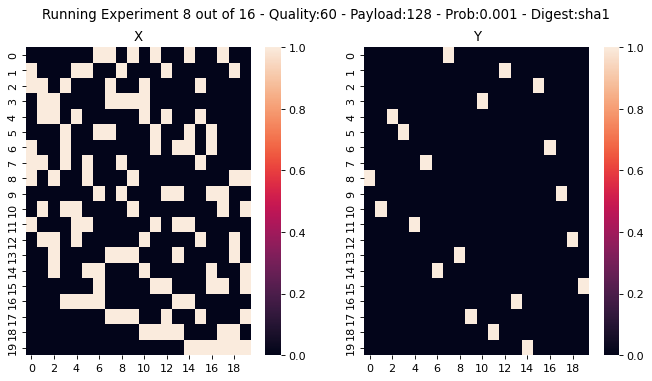

[ WARN:0@96.128] global ./modules/videoio/src/cap_gstreamer.cpp (1405) open OpenCV | GStreamer warning: Cannot query video position: status=0, value=-1, duration=-1


frame per second:  29 fps ,data rate:  1048 KB/s
frame per second:  31 fps ,data rate:  1120 KB/s
frame per second:  31 fps ,data rate:  1106 KB/s
frame per second:  31 fps ,data rate:  1128 KB/s
frame per second:  30 fps ,data rate:  1130 KB/s
frame per second:  30 fps ,data rate:  1130 KB/s
frame per second:  31 fps ,data rate:  1178 KB/s
frame per second:  31 fps ,data rate:  1173 KB/s
frame per second:  31 fps ,data rate:  1139 KB/s


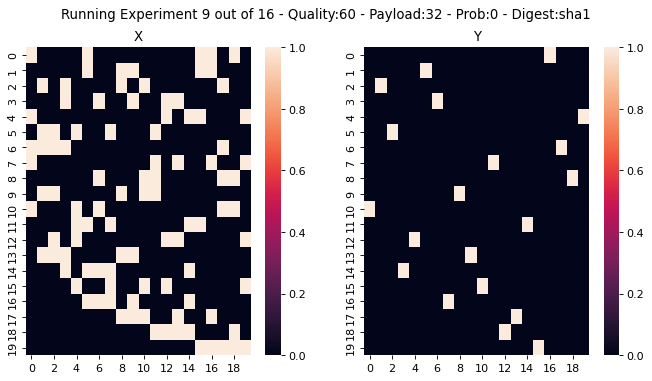

[ WARN:0@108.019] global ./modules/videoio/src/cap_gstreamer.cpp (1405) open OpenCV | GStreamer warning: Cannot query video position: status=0, value=-1, duration=-1


frame per second:  22 fps ,data rate:  834 KB/s
frame per second:  26 fps ,data rate:  974 KB/s
frame per second:  25 fps ,data rate:  972 KB/s
frame per second:  25 fps ,data rate:  965 KB/s
frame per second:  25 fps ,data rate:  944 KB/s
frame per second:  26 fps ,data rate:  979 KB/s
frame per second:  27 fps ,data rate:  999 KB/s
frame per second:  27 fps ,data rate:  1005 KB/s
frame per second:  26 fps ,data rate:  962 KB/s


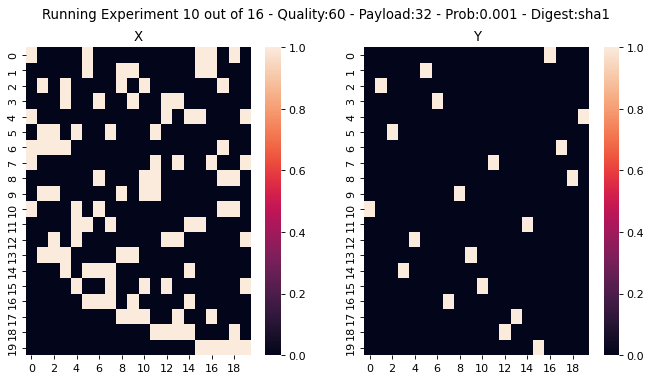

[ WARN:0@120.000] global ./modules/videoio/src/cap_gstreamer.cpp (1405) open OpenCV | GStreamer warning: Cannot query video position: status=0, value=-1, duration=-1


frame per second:  25 fps ,data rate:  920 KB/s
frame per second:  26 fps ,data rate:  982 KB/s
frame per second:  27 fps ,data rate:  1016 KB/s
frame per second:  27 fps ,data rate:  1017 KB/s
frame per second:  26 fps ,data rate:  968 KB/s
frame per second:  27 fps ,data rate:  999 KB/s
frame per second:  28 fps ,data rate:  1069 KB/s
frame per second:  26 fps ,data rate:  975 KB/s
frame per second:  24 fps ,data rate:  912 KB/s


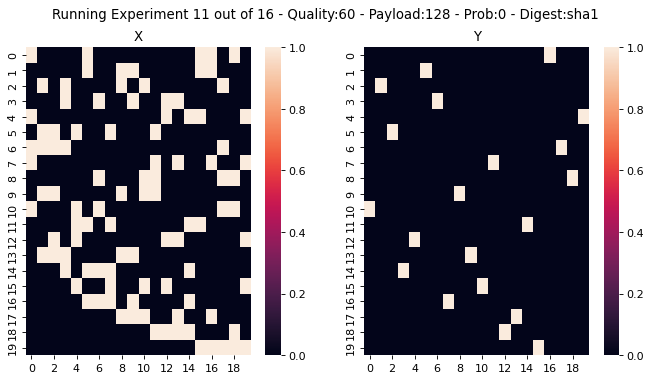

[ WARN:0@131.974] global ./modules/videoio/src/cap_gstreamer.cpp (1405) open OpenCV | GStreamer warning: Cannot query video position: status=0, value=-1, duration=-1


frame per second:  30 fps ,data rate:  1128 KB/s
frame per second:  31 fps ,data rate:  1177 KB/s
frame per second:  31 fps ,data rate:  1158 KB/s
frame per second:  31 fps ,data rate:  1165 KB/s
frame per second:  30 fps ,data rate:  1080 KB/s
frame per second:  30 fps ,data rate:  1018 KB/s
frame per second:  31 fps ,data rate:  1104 KB/s
frame per second:  30 fps ,data rate:  1092 KB/s
frame per second:  31 fps ,data rate:  1124 KB/s


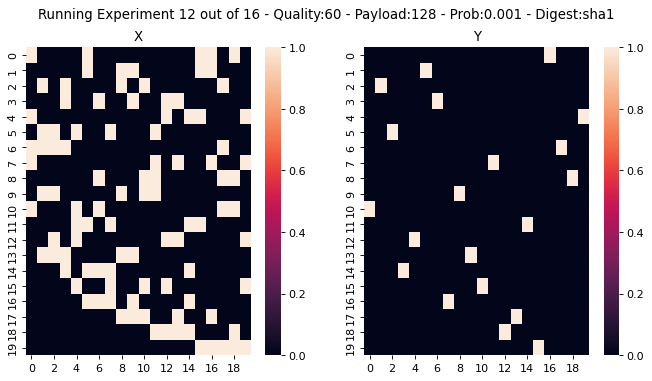

[ WARN:0@143.956] global ./modules/videoio/src/cap_gstreamer.cpp (1405) open OpenCV | GStreamer warning: Cannot query video position: status=0, value=-1, duration=-1


frame per second:  30 fps ,data rate:  1109 KB/s
frame per second:  31 fps ,data rate:  1147 KB/s
frame per second:  31 fps ,data rate:  1147 KB/s
frame per second:  30 fps ,data rate:  1139 KB/s
frame per second:  30 fps ,data rate:  1131 KB/s
frame per second:  31 fps ,data rate:  1169 KB/s
frame per second:  30 fps ,data rate:  1136 KB/s
frame per second:  31 fps ,data rate:  1178 KB/s
frame per second:  31 fps ,data rate:  1172 KB/s


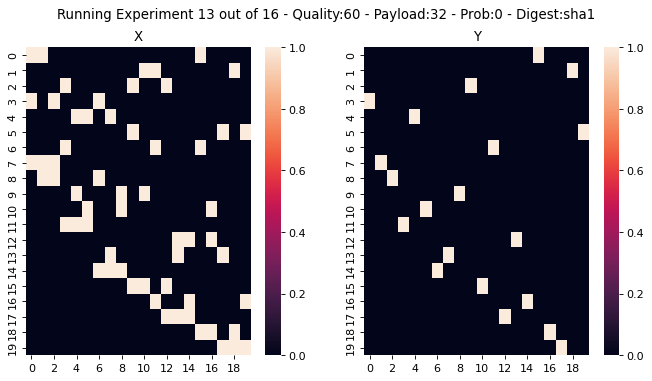

[ WARN:0@155.934] global ./modules/videoio/src/cap_gstreamer.cpp (1405) open OpenCV | GStreamer warning: Cannot query video position: status=0, value=-1, duration=-1


frame per second:  27 fps ,data rate:  1008 KB/s
frame per second:  25 fps ,data rate:  937 KB/s
frame per second:  25 fps ,data rate:  948 KB/s
frame per second:  26 fps ,data rate:  980 KB/s
frame per second:  25 fps ,data rate:  941 KB/s
frame per second:  26 fps ,data rate:  985 KB/s
frame per second:  28 fps ,data rate:  1069 KB/s
frame per second:  27 fps ,data rate:  1007 KB/s
frame per second:  26 fps ,data rate:  987 KB/s


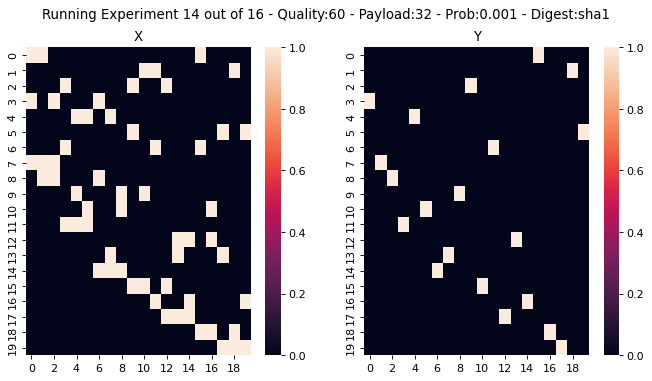

[ WARN:0@167.851] global ./modules/videoio/src/cap_gstreamer.cpp (1405) open OpenCV | GStreamer warning: Cannot query video position: status=0, value=-1, duration=-1


frame per second:  21 fps ,data rate:  789 KB/s
frame per second:  26 fps ,data rate:  988 KB/s
frame per second:  25 fps ,data rate:  944 KB/s
frame per second:  25 fps ,data rate:  950 KB/s
frame per second:  27 fps ,data rate:  994 KB/s
frame per second:  26 fps ,data rate:  964 KB/s
frame per second:  26 fps ,data rate:  989 KB/s
frame per second:  27 fps ,data rate:  994 KB/s
frame per second:  27 fps ,data rate:  1016 KB/s


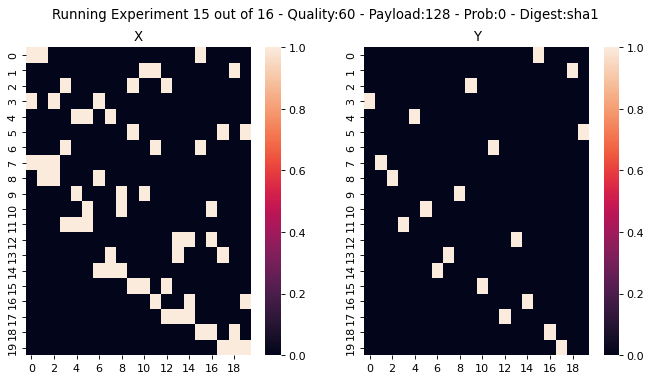

[ WARN:0@179.901] global ./modules/videoio/src/cap_gstreamer.cpp (1405) open OpenCV | GStreamer warning: Cannot query video position: status=0, value=-1, duration=-1


frame per second:  30 fps ,data rate:  1046 KB/s
frame per second:  31 fps ,data rate:  1114 KB/s
frame per second:  30 fps ,data rate:  1056 KB/s
frame per second:  30 fps ,data rate:  1044 KB/s
frame per second:  31 fps ,data rate:  1076 KB/s
frame per second:  31 fps ,data rate:  1120 KB/s
frame per second:  31 fps ,data rate:  1118 KB/s
frame per second:  31 fps ,data rate:  1132 KB/s
frame per second:  31 fps ,data rate:  1147 KB/s


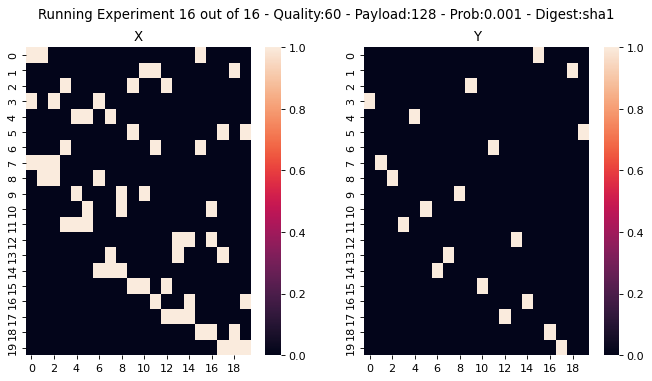

[ WARN:0@191.811] global ./modules/videoio/src/cap_gstreamer.cpp (1405) open OpenCV | GStreamer warning: Cannot query video position: status=0, value=-1, duration=-1


frame per second:  30 fps ,data rate:  1040 KB/s
frame per second:  30 fps ,data rate:  1041 KB/s
frame per second:  31 fps ,data rate:  1148 KB/s
frame per second:  31 fps ,data rate:  1153 KB/s
frame per second:  30 fps ,data rate:  1118 KB/s
frame per second:  31 fps ,data rate:  1109 KB/s
frame per second:  31 fps ,data rate:  1137 KB/s
frame per second:  30 fps ,data rate:  1062 KB/s
frame per second:  31 fps ,data rate:  1137 KB/s


In [2]:
###### IP, PORRT ######
IP = "10.42.0.15"
PORT = 23422
#######################



################# number of experimnets ###############
# qualities = [30, 60, 95]
# payloads_size = [32, 128, 256, 1024]
# attack_probabilities = [0, 0.001, 0.05, 0.1, 0.2, 0.3]

qualities = [60]
payload_sizes = [32, 128]
attack_probabilities = [0, 0.001]

digets = ['sha1']
Duration = 10 # Seconds
exp = utils.Load_Experiments("../Examples/Xs.pkl")
#######################################################

total_number_of_experiments = 0
for i in range(len(exp)):
    if not(exp[i]['parameters']['m_nr'] == 20 and exp[i]['parameters']['t_nr'] == 20):
        continue
    if np.array_equal(np.array(exp[i]['results']['X']),np.ones(np.array(exp[i]['results']['X']).shape)) or exp[i]['parameters']['q'] != 1:
        continue
    total_number_of_experiments += 1

total_number_of_experiments = len(qualities)*len(payload_sizes)*len(attack_probabilities)*len(digets)*total_number_of_experiments
print("Total runtime for experiments: ", total_number_of_experiments*Duration/60, "minutes")

cnt = 0
for i in range(len(exp)):
    if not(exp[i]['parameters']['m_nr'] == 20 and exp[i]['parameters']['t_nr'] == 20):
        continue
    if np.array_equal(np.array(exp[i]['results']['X']),np.ones(np.array(exp[i]['results']['X']).shape)) or exp[i]['parameters']['q'] != 1:
        continue

    X = exp[i]['results']['X']
    Y = utils.Get_Y(X)
    # try:
    #     if Y := utils.Get_Y(X) is None:
    #         continue
    # except:
    #     continue

    for quality in qualities:
        for payload_size in payload_sizes:
            for attack_prob in attack_probabilities:
                for digest in digets:

                    param = {}
                    param['X'] = X.tolist()
                    param['Y'] = Y.tolist()
                    param['KEY'] = "key"
                    param['DIGESTMOD'] = digest
                    param['PAYLOAD_SIZE_BYTE'] = payload_size
                    param['QUALITY'] = quality
                    param['ATTACK_PROBABILITY'] = attack_prob
                    param['DURATION'] = Duration

                    plt.figure(figsize = (10,5), dpi=80)
                    plt.subplot(1, 2, 1)
                    sns.heatmap(param['X'])
                    plt.title('X')
                    plt.subplot(1, 2, 2)
                    try:
                        sns.heatmap(param['Y'])
                        plt.title('Y')
                    except:
                        pass
                    cnt += 1
                    plt.suptitle(f'Running Experiment {cnt} out of {total_number_of_experiments}' + ' - Quality:' + str(quality) + ' - Payload:' + str(payload_size) + ' - Prob:' + str(attack_prob) + ' - Digest:' + digest)
                    plt.show()

                    tx_param(IP, PORT, param)
                    run_experiment(IP, PORT, param)


                    

           


